In [1]:
from chessnet.notebook_config import *
from chessnet.statistics import read_elo_data

In [22]:
elo_data = {
    "OTB": read_elo_data(Database.OTB),
    "Portal": read_elo_data(Database.Portal)
}
elo_data = {k: v[(v.MeanElo>=1300)&(v.MeanElo<=3000)] for k, v in elo_data.items()}

In [83]:
dfs = {
    "OTB": pd.read_csv(ARTIFACTS_DIR / f"{Database.OTB}.csv"),
    "Portal": pd.read_csv(ARTIFACTS_DIR / f"{Database.Portal}.csv"),
}

In [107]:
dfs["Portal"][["WhiteElo", "BlackElo"]].dropna().sort_values(by="WhiteElo").head(30)

,WhiteElo,BlackElo
15168265,800.0,2377.0
15371291,829.0,2404.0
15344053,943.0,2408.0
10578586,1033.0,2655.0
12451737,1133.0,2622.0
15343999,1205.0,2408.0
12681568,1214.0,2796.0
15344230,1215.0,2408.0
15458944,1241.0,2408.0
15458882,1241.0,2408.0


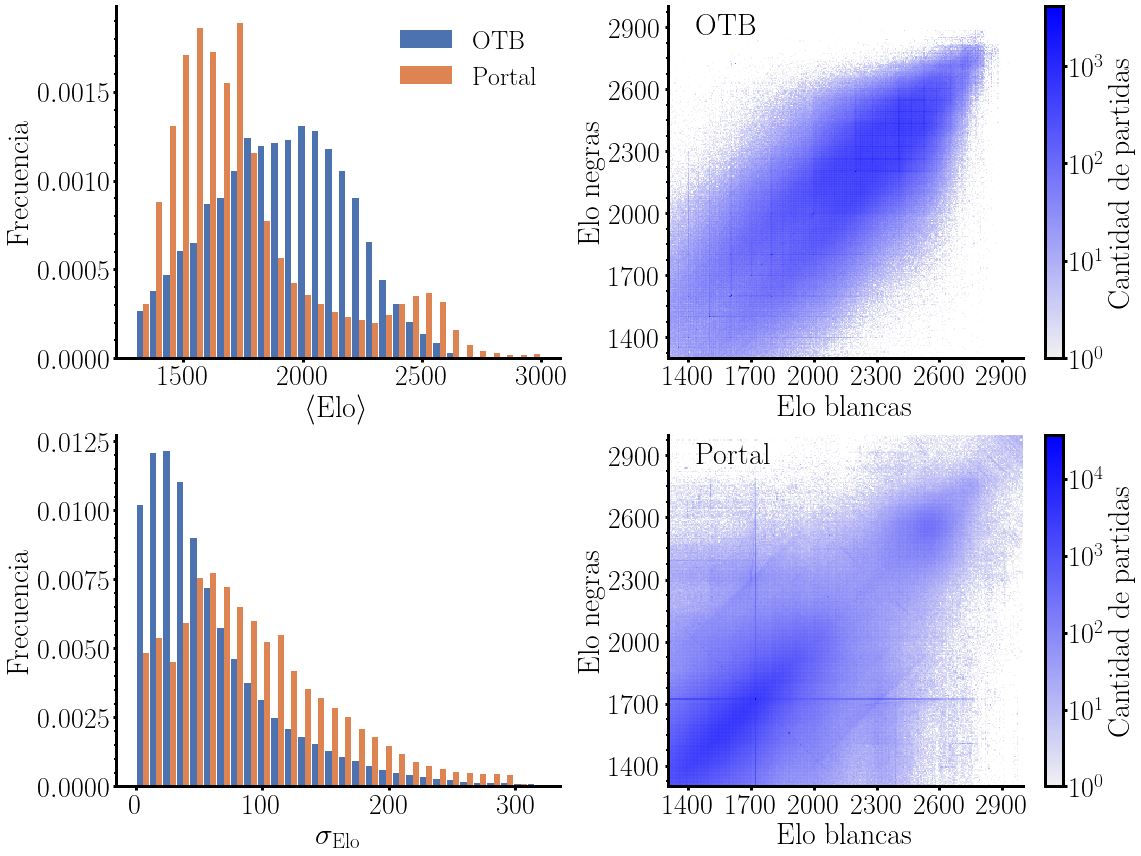

In [113]:
ncols, nrows = 2, 2
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)
ax = axes[0,0]
ax.set_xlabel(r"$\langle \mathrm{Elo} \rangle$")
ax.set_ylabel(r"$\mathrm{Frecuencia}$")
ax.hist(
    [elo_data["OTB"]["MeanElo"], elo_data["Portal"]["MeanElo"]],
    rwidth=0.9,
    bins=30,
    density=True,
    label=[database_latex["OTB"], database_latex["Portal"]]
)
ax.legend(frameon=False)

ax = axes[1,0]
ax.set_xlabel(r"$\sigma_{\mathrm{Elo}}$")
ax.set_ylabel(r"$\mathrm{Frecuencia}$")
elo_std_otb = elo_data["OTB"][(elo_data["OTB"]>0)&(elo_data["OTB"]<320)]["StdElo"]
elo_std_portal = elo_data["Portal"][(elo_data["Portal"]>0)&(elo_data["Portal"]<320)]["StdElo"]
ax.hist([elo_std_otb, elo_std_portal], rwidth=0.9, density=True, bins=30)

cmap = sns.color_palette("light:b", as_cmap=True)
for i, (name, df) in enumerate(dfs.items()):
    ax = axes[i,1]
    ax.set_xlabel(r"$\mathrm{Elo\;blancas}$")
    ax.set_ylabel(r"$\mathrm{Elo\;negras}$")
    min_elo, max_elo = 1300, 3000
    data = df.dropna(subset=["WhiteElo", "BlackElo"])
    mask = (
        (data.WhiteElo>=min_elo)&(data.BlackElo>=min_elo) &
        (data.WhiteElo<=max_elo)&(data.BlackElo<=max_elo)
    )
    data = data[mask]
    histo = ax.hist2d(
        data.WhiteElo,
        data.BlackElo,
        bins=300,
        norm=mpl.colors.LogNorm(),
        density=False,
        cmap=cmap,
    )
    ax.set_xlim(min_elo, max_elo)
    ax.set_ylim(min_elo, max_elo)
    ax.set_xticks([1400, 1700, 2000, 2300, 2600, 2900])
    ax.set_yticks([1400, 1700, 2000, 2300, 2600, 2900])
    cbar = fig.colorbar(histo[3], ax=ax)
    cbar.ax.set_ylabel(r"$\mathrm{Cantidad\;de\;partidas}$")
    ax.text(0.08, 0.92, database_latex[name], transform=ax.transAxes, fontsize=30)
sns.despine()
plt.tight_layout()
plt.show()

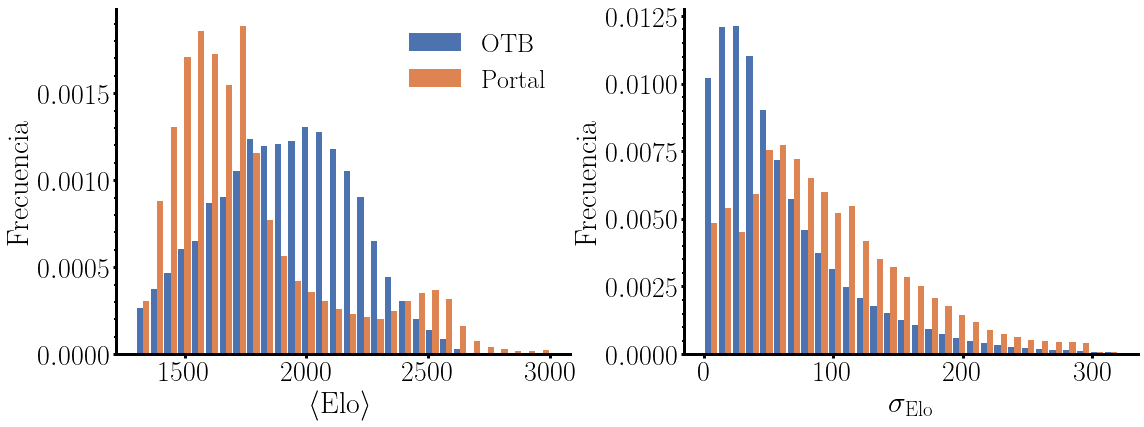

In [129]:
ncols, nrows = 2, 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
ax.set_xlabel(r"$\langle \mathrm{Elo} \rangle$")
ax.set_ylabel(r"$\mathrm{Frecuencia}$")
ax.hist(
    [elo_data["OTB"]["MeanElo"], elo_data["Portal"]["MeanElo"]],
    rwidth=0.9,
    bins=30,
    density=True,
    label=[database_latex["OTB"], database_latex["Portal"]]
)
ax.legend(frameon=False)

ax = axes[1]
ax.set_xlabel(r"$\sigma_{\mathrm{Elo}}$")
ax.set_ylabel(r"$\mathrm{Frecuencia}$")
elo_std_otb = elo_data["OTB"][(elo_data["OTB"]>0)&(elo_data["OTB"]<320)]["StdElo"]
elo_std_portal = elo_data["Portal"][(elo_data["Portal"]>0)&(elo_data["Portal"]<320)]["StdElo"]
ax.hist([elo_std_otb, elo_std_portal], rwidth=0.9, density=True, bins=30)

sns.despine()
plt.tight_layout()
plt.savefig(FIGS_DIR / "elo_stats.pdf")
plt.show()

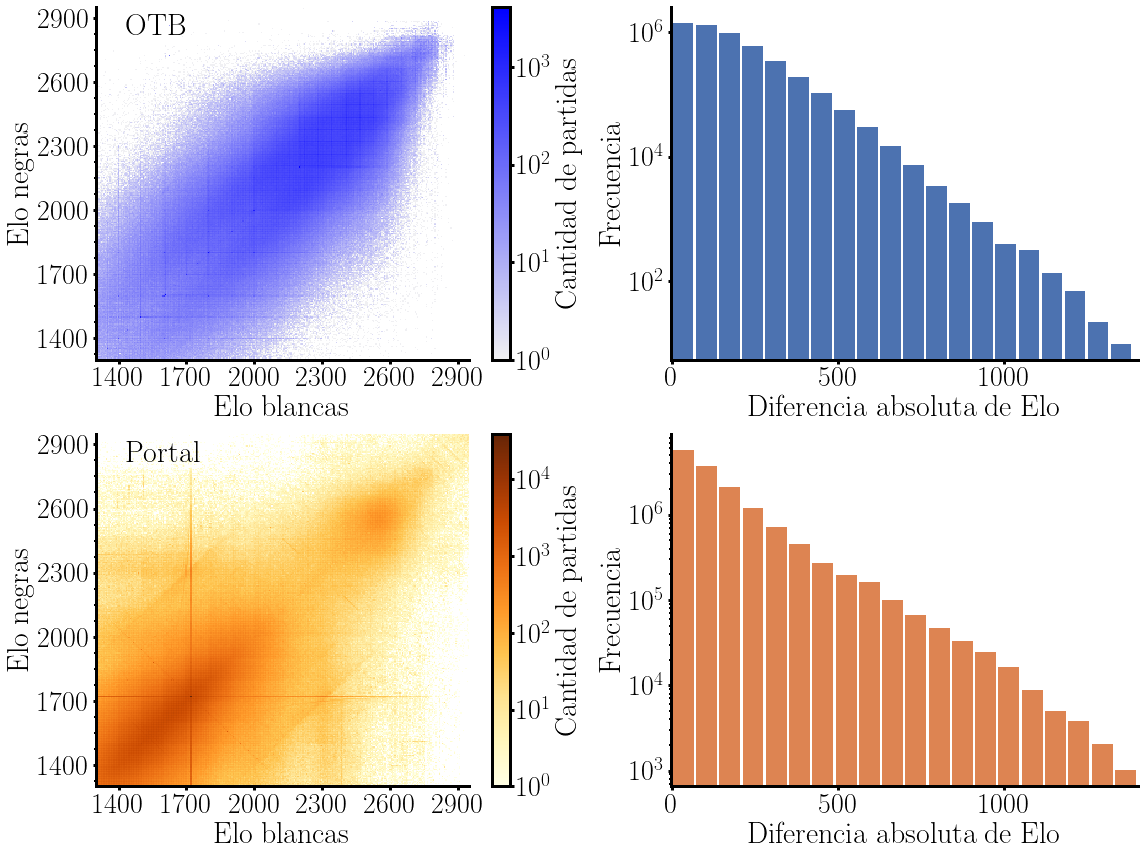

In [128]:
ncols, nrows = 2, 2
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, (name, df) in enumerate(dfs.items()):
    ax = axes[i,1]
    df["Diff"] = np.abs(df.WhiteElo - df.BlackElo)
    max_diff = 1400
    df[df.Diff<max_diff].Diff.plot(
        kind="hist", rwidth=0.9, bins=20, log=True, ax=ax, color=f"C{i}", alpha=1
    )
    ax.set_xlabel(r"$\mathrm{Diferencia\;absoluta\;de\;Elo}$")
    ax.set_ylabel(r"$\mathrm{Frecuencia}$")
    ax.set_xlim(-1, max_diff+1)


for i, (name, df) in enumerate(dfs.items()):
    if name == "OTB":
        cmap = sns.color_palette("light:b", as_cmap=True)
    else:
        cmap = sns.color_palette("YlOrBr", as_cmap=True)
    ax = axes[i,0]
    ax.set_xlabel(r"$\mathrm{Elo\;blancas}$")
    ax.set_ylabel(r"$\mathrm{Elo\;negras}$")
    min_elo, max_elo = 1300, 2950
    data = df.dropna(subset=["WhiteElo", "BlackElo"])
    mask = (
        (data.WhiteElo>=min_elo)&(data.BlackElo>=min_elo) &
        (data.WhiteElo<=max_elo)&(data.BlackElo<=max_elo)
    )
    data = data[mask]
    histo = ax.hist2d(
        data.WhiteElo,
        data.BlackElo,
        bins=300,
        norm=mpl.colors.LogNorm(),
        density=False,
        cmap=cmap,
    )
    ax.set_xlim(min_elo, max_elo)
    ax.set_ylim(min_elo, max_elo)
    ax.set_xticks([1400, 1700, 2000, 2300, 2600, 2900])
    ax.set_yticks([1400, 1700, 2000, 2300, 2600, 2900])
    cbar = fig.colorbar(histo[3], ax=ax)
    cbar.ax.set_ylabel(r"$\mathrm{Cantidad\;de\;partidas}$")
    ax.text(0.08, 0.92, database_latex[name], transform=ax.transAxes, fontsize=30)

sns.despine()
plt.tight_layout()
plt.savefig(FIGS_DIR / "elo_histo2d.pdf")
plt.show()